## **Using all the Regressors with Bigmart Sales Preprocessed Data**



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
# Mount the Google Drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/lkant/Documents/05_Streamlit_Bigmart_Sales/Data-Files/Bigmart_sales_train_preprocessed1.csv')
print(dataset.shape)
dataset.head()

(2637, 15)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_0,Item_Type_1,Item_Type_2,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Item_Outlet_Sales
0,0.281026,0.0,0.085894,0.930093,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3735.1380
1,0.079356,1.0,0.103188,0.069907,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,443.4228
2,0.430191,0.0,0.000000,0.058260,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1516.0266
3,0.627088,1.0,0.535330,0.484803,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1589.2646
4,0.263126,1.0,0.370379,0.095909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,718.3982


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                2637 non-null   float64
 1   Item_Fat_Content           2637 non-null   float64
 2   Item_Visibility            2637 non-null   float64
 3   Item_MRP                   2637 non-null   float64
 4   Outlet_Establishment_Year  2637 non-null   float64
 5   Outlet_Size                2637 non-null   float64
 6   Outlet_Location_Type       2637 non-null   float64
 7   Outlet_Type                2637 non-null   float64
 8   Item_Type_0                2637 non-null   float64
 9   Item_Type_1                2637 non-null   float64
 10  Item_Type_2                2637 non-null   float64
 11  Outlet_Identifier_0        2637 non-null   float64
 12  Outlet_Identifier_1        2637 non-null   float64
 13  Outlet_Identifier_2        2637 non-null   float

In [5]:
X=dataset.drop(['Item_Outlet_Sales'], axis=1)
y=dataset['Item_Outlet_Sales']
X[:5]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_0,Item_Type_1,Item_Type_2,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2
0,0.281026,0.0,0.085894,0.930093,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.079356,1.0,0.103188,0.069907,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.430191,0.0,0.000000,0.058260,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.627088,1.0,0.535330,0.484803,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.263126,1.0,0.370379,0.095909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [6]:
y[:5]

0    3735.1380
1     443.4228
2    1516.0266
3    1589.2646
4     718.3982
Name: Item_Outlet_Sales, dtype: float64

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2109, 14)
(2109,)
(528, 14)
(528,)


##**1) Linear Regressor (LR)**

In [8]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model=LR.fit(X_train, y_train)

In [9]:
# Calculate the accuracy of learning by the Algorithm
LR.score(X_train,y_train) 

0.451132039425331

In [10]:
# Predicting the Test set results
y_pred = LR.predict(X_test)

In [11]:
# Calcualte the accuracy of prediction (y_test Vs y_pred) # This measure is part of Model Evaluation
r2_score(y_test, y_pred)

0.4300246054677873

In [12]:
# Calculate the Model Error (RMSE) # This measure is also part of Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1174.898345302054

In [13]:
LR_Training_Acc= LR.score(X_train,y_train)
LR_Testing_Acc = r2_score(y_test,y_pred)

In [14]:
print("Training Accuracy :", LR_Training_Acc)
print("Testing Accuracy :", LR_Testing_Acc)

Training Accuracy : 0.451132039425331
Testing Accuracy : 0.4300246054677873


In [15]:
New_prediction1 = LR.predict(X_train)
print(New_prediction1[:5])

[3832.  816.  600.  728. 2448.]


In [16]:
LR_Training_Err= mean_squared_error(y_train,New_prediction1)
LR_Testing_Err = mean_squared_error(y_test, y_pred)

In [17]:
print("Training Error :", LR_Training_Err)
print("Testing Error :", LR_Testing_Err)

Training Error : 1281527.8698062773
Testing Error : 1380386.1217935046


In [18]:
# k-fold CV 
#lm = LinearRegression()
scores1 = cross_val_score(LR, X, y, scoring='r2', cv=5)
print(scores1)
LR_CV_Average=np.average(scores1)   
LR_CV_Average

[0.49401078 0.3591313  0.42651361 0.45318593 0.46470063]


0.4395084510462165

##**2) Random Forest Regressor (RFR)**

In [19]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=300, random_state=0)
RFR.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [20]:
# Calculate the accuracy of learning by the Algorithm
RFR.score(X_train,y_train) 

0.9130836063393934

In [21]:
# Predicting the Test set results
RFR_y_pred = RFR.predict(X_test)
print(y_test)
print()
print(RFR_y_pred)

2317     503.3448
1708    1797.6600
1674    1091.9120
1332    1874.8928
2572    1917.5040
          ...    
2531     973.3996
39       707.0796
704     2976.7918
2327    2082.6224
2156    2616.5940
Name: Item_Outlet_Sales, Length: 528, dtype: float64

[1293.68269    1962.139232   1980.18019267 3645.761008   3060.576072
 1958.091168   4879.31973867 2537.470328   2485.51573467 3811.60734933
 2383.703818   1558.524614    845.805688   1347.206352   3280.89816933
 3682.74841733 3734.93604067  925.36434933 2986.09524533 3108.53586533
 4417.72503733  799.099818   3204.60636667  522.95482933 3463.77345533
  644.54544467  468.16170867 1412.21950267 2816.80893733  889.402272
 2163.17310333 2773.463138   1952.59609867 4138.85026867  755.423338
  753.78103133 1916.298902   2863.53700067 2074.63723867  451.50117333
 3496.29778533 4843.12685067 2951.56241867 3719.584912   3254.08196467
 2774.83912467 2070.211888   3956.22576733 1527.784628   2832.619468
 1991.927124   3169.43215267 3798.841744   440

In [22]:
RFR_Training_Acc = RFR.score(X_train,y_train)
RFR_Testing_Acc = r2_score(y_test,RFR_y_pred)

In [23]:
print("Training Accuracy :", RFR_Training_Acc)
print("Testing Accuracy :", RFR_Testing_Acc)

Training Accuracy : 0.9130836063393934
Testing Accuracy : 0.3498741335927529


In [24]:
RFR_Train_Prediction = RFR.predict(X_train)
print(RFR_Train_Prediction[:5])

[2179.08794267  714.87389867  711.18314733  498.28472    1482.90305   ]


In [25]:
RFR_Training_Err = mean_squared_error(y_train,RFR_Train_Prediction)
RFR_Testing_Err = mean_squared_error(y_test, RFR_y_pred)

In [26]:
print("Training Error :", RFR_Training_Err)
print("Testing Error :", RFR_Testing_Err)

Training Error : 202937.29789310182
Testing Error : 1574497.3064040276


In [27]:
# k-fold CV 
#lm = LinearRegression()
RFR_scores = cross_val_score(RFR, X, y, scoring='r2', cv=5)
print(RFR_scores)
RFR_CV_Average=np.average(RFR_scores)   
RFR_CV_Average

[0.41119713 0.27537578 0.30751776 0.40697858 0.38825779]


0.35786540795555405

##**3) Decision Tree Regressor (DTR)**

In [28]:
from sklearn.tree import DecisionTreeRegressor 
#DecisionTreeRegressor class has many parameters. Input only random_state=0 or 42.
DTR = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset. 
DTR.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [29]:
DTR_y_pred = DTR.predict(X_test)
print(y_test)
print()
print(DTR_y_pred)

2317     503.3448
1708    1797.6600
1674    1091.9120
1332    1874.8928
2572    1917.5040
          ...    
2531     973.3996
39       707.0796
704     2976.7918
2327    2082.6224
2156    2616.5940
Name: Item_Outlet_Sales, Length: 528, dtype: float64

[1498.05   1821.6288 2293.0152 2847.6266 2302.3364 1398.18   6183.9504
 3119.9388 3803.0496 3874.2902 3414.8882 1537.998   808.947   974.0654
 4262.4516 2797.6916 4027.4242 1378.206  1691.7978 5920.2936 4074.696
 1102.5648 5690.5926  105.8622 3755.112   703.0848  143.8128  856.8846
 2246.4092 1255.6988 2049.3324 1018.674  1911.5118 1800.3232 1034.6532
 1255.6988 2664.5316  360.8636 1454.1072  549.9508 4570.0512 2103.928
  515.3292 3916.2356 4761.8016 3048.6982  487.3656 3307.6944 1320.9472
 1764.37   2004.058  2591.2936  998.7    5896.3248 2376.906  2021.3688
 4363.6532 2021.3688 2237.088  2703.148  2812.3392  596.5568 1640.5312
 1777.686  1468.089   998.7    2878.2534 4011.445   703.0848 4141.276
 3237.1196 2442.1544  614.5334 2998.0974 

In [30]:
DTR_Training_Acc = DTR.score(X_train,y_train)
DTR_Testing_Acc = r2_score(y_test,DTR_y_pred)

In [31]:
print("Training Accuracy :", DTR_Training_Acc)
print("Testing Accuracy :", DTR_Testing_Acc)

Training Accuracy : 1.0
Testing Accuracy : -0.16884153909363486


In [32]:
DTR_Train_Prediction = DTR.predict(X_train)
print(DTR_Train_Prediction[:5])

[1225.072   552.614   729.051   314.2576 1264.3542]


In [33]:
DTR_Training_Err = mean_squared_error(y_train,DTR_Train_Prediction)
DTR_Testing_Err = mean_squared_error(y_test, DTR_y_pred)

In [34]:
print("Training Error :", DTR_Training_Err)
print("Testing Error :", DTR_Testing_Err)

Training Error : 0.0
Testing Error : 2830740.861129274


In [35]:
# k-fold CV 
#lm = LinearRegression()
DTR_scores = cross_val_score(DTR, X, y, scoring='r2', cv=5)
print(DTR_scores)
DTR_CV_Average=np.average(DTR_scores)   
DTR_CV_Average

[ 0.02106192 -0.45685907 -0.21611207 -0.19316511 -0.06421493]


-0.18185784976475552

##**4) Support Vector Regressor**

In [36]:
from sklearn.svm import SVR
SVR = SVR()
#SVR_regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
SVR.fit(X_train, y_train)

SVR()

In [37]:
SVR_y_pred = SVR.predict(X_test)
print(y_test)
print()
print(SVR_y_pred)

2317     503.3448
1708    1797.6600
1674    1091.9120
1332    1874.8928
2572    1917.5040
          ...    
2531     973.3996
39       707.0796
704     2976.7918
2327    2082.6224
2156    2616.5940
Name: Item_Outlet_Sales, Length: 528, dtype: float64

[1966.63432095 1956.93904954 1985.02056564 2019.56674297 1974.49599729
 1956.47954014 2007.36549999 1995.11318693 2009.61665986 1968.81042381
 2007.96426307 1968.02305066 1940.17079745 1952.91021305 1991.43294466
 2015.55307724 1965.30826658 1946.42451003 1993.9817669  1970.45507992
 2007.16750673 1959.07808963 1966.05144012 1946.69628244 1987.13279557
 1966.799291   1948.53951721 1964.85739584 1993.50404422 1957.90268104
 1943.98806931 1966.60623549 1974.25176275 2009.33455545 1953.99011447
 1958.84132083 1986.73613276 1965.81353658 1987.93836087 1947.92377242
 1976.53557341 2020.44550925 1984.61082811 2002.18786004 2004.97995001
 1990.7160514  1981.10172994 2016.64422404 1967.71360714 2000.13013044
 2008.03611515 1987.48677731 2013.3662

In [38]:
SVR_Training_Acc = SVR.score(X_train,y_train)
SVR_Testing_Acc = r2_score(y_test,SVR_y_pred)

In [39]:
print("Training Accuracy :", SVR_Training_Acc)
print("Testing Accuracy :", SVR_Testing_Acc)

Training Accuracy : -0.04039784309147043
Testing Accuracy : -0.018239554036731498


In [40]:
SVR_Train_Prediction = SVR.predict(X_train)
print(SVR_Train_Prediction[:5])

[1998.39096769 1951.39760149 1937.86150951 1961.84117916 1984.43328277]


In [41]:
SVR_Training_Err = mean_squared_error(y_train, SVR_Train_Prediction)
SVR_Testing_Err = mean_squared_error(y_test, SVR_y_pred)

In [42]:
print("Training Error :", SVR_Training_Err)
print("Testing Error :", SVR_Testing_Err)

Training Error : 2429179.5611681966
Testing Error : 2466007.765487979


In [43]:
# k-fold CV 
#lm = LinearRegression()
SVR_scores = cross_val_score(SVR, X, y, scoring='r2', cv=5)
print(SVR_scores)
SVR_CV_Average=np.average(SVR_scores)   
SVR_CV_Average

[-0.04830466 -0.03930445 -0.06565402 -0.02495237 -0.04295155]


-0.04423341045419802

##**5) KNN Regressor**

In [44]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    KNN_Regressor = neighbors.KNeighborsRegressor(n_neighbors = K)

    KNN_Regressor.fit(X_train, y_train)  #fit the model
    KNN_pred=KNN_Regressor.predict(X_test) #make prediction on test set
    KNN_error = sqrt(mean_squared_error(y_test,KNN_pred)) #calculate rmse
    rmse_val.append(KNN_error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', KNN_error)

RMSE value for k=  1 is: 1608.436148793827
RMSE value for k=  2 is: 1423.2776110967618
RMSE value for k=  3 is: 1358.1143652461194
RMSE value for k=  4 is: 1329.486494324684
RMSE value for k=  5 is: 1324.1779082320606
RMSE value for k=  6 is: 1303.9439229292905
RMSE value for k=  7 is: 1305.3585623613035
RMSE value for k=  8 is: 1293.3629080401006
RMSE value for k=  9 is: 1293.2382698422077
RMSE value for k=  10 is: 1294.9980509702489
RMSE value for k=  11 is: 1307.32857873863
RMSE value for k=  12 is: 1310.7847393315835
RMSE value for k=  13 is: 1317.3570393167918
RMSE value for k=  14 is: 1317.670162257125
RMSE value for k=  15 is: 1316.6514516909012
RMSE value for k=  16 is: 1322.1700350441015
RMSE value for k=  17 is: 1327.0813229162734
RMSE value for k=  18 is: 1328.2576825175126
RMSE value for k=  19 is: 1324.9094768718187
RMSE value for k=  20 is: 1331.441156612806


<Axes: >

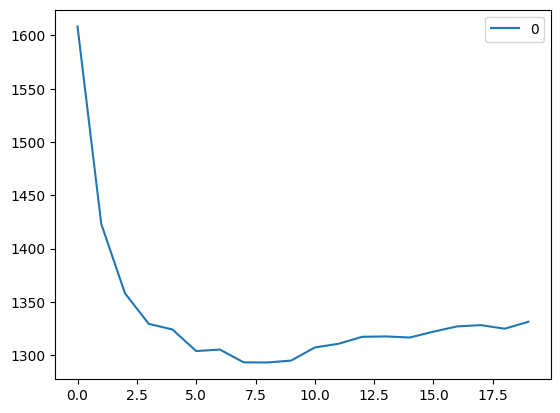

In [46]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [47]:
from sklearn.neighbors import KNeighborsRegressor
KNNR = KNeighborsRegressor(n_neighbors=5)
KNNR.fit(X_train, y_train)

KNeighborsRegressor()

In [48]:
KNN1_y_pred=KNNR.predict(X_test)

In [49]:
KNN1_Training_Acc = KNNR.score(X_train,y_train)
KNN1_Testing_Acc = r2_score(y_test,KNN1_y_pred)

In [50]:
print("Training Accuracy :", KNN1_Training_Acc)
print("Testing Accuracy :", KNN1_Testing_Acc)

Training Accuracy : 0.517999414123457
Testing Accuracy : 0.2759839399682307


In [51]:
KNN1_Train_Prediction = KNNR.predict(X_train)
print(KNN1_Train_Prediction[:5])

[1746.79288 1311.35968  680.84708  795.76416 2142.14492]


In [52]:
KNN1_Training_Err = mean_squared_error(y_train, KNN1_Train_Prediction)
KNN1_Testing_Err = mean_squared_error(y_test, KNN1_y_pred)

In [53]:
print("Training Error :", KNN1_Training_Err)
print("Testing Error :", KNN1_Testing_Err)

Training Error : 1125402.152126005
Testing Error : 1753447.1326498357


In [54]:
# k-fold CV 
#lm = LinearRegression()
KNNR_scores = cross_val_score(KNNR, X, y, scoring='r2', cv=5)
print(KNNR_scores)
KNNR_CV_Average=np.average(KNNR_scores)   
DTR_CV_Average

[0.34249376 0.15136242 0.25514699 0.28972275 0.32361201]


-0.18185784976475552

##**6) Ridge Regressor**

###**a) Module Tuning for Ridge Regression**

In [55]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    ridge.fit(X_train, y_train)
    # calculate errors
    new_train_error1 = np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))
    #new_validation_error1 = np.sqrt(mean_squared_error(y_validation, ridge.predict(X_validation)))
    new_test_error1 = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
    # print errors as report
    #print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
    print('alpha: {:7} | train error: {:5} | test error: {}'.
          format(alpha,
                 round(new_train_error1,3),
                 #round(new_validation_error1,3),
                 round(new_test_error1,3)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 1131.135 | test error: 1172.918
alpha:    0.01 | train error: 1131.135 | test error: 1172.919
alpha:     0.1 | train error: 1131.135 | test error: 1172.921
alpha:       1 | train error: 1131.156 | test error: 1172.962
alpha:      10 | train error: 1132.939 | test error: 1174.89


###**b) Execution of Ridge Regression**

In [56]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train) 
pred_train_ridge= ridge.predict(X_train)
Ridge_Train_Acc = r2_score(y_train, pred_train_ridge)
Ridge_Train_Err = np.sqrt(mean_squared_error(y_train,pred_train_ridge))
print("Train Error : ", np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
print("Train Accuracy : ", r2_score(y_train, pred_train_ridge))
pred_test_ridge= ridge.predict(X_test)
Ridge_Test_Acc = r2_score(y_test, pred_test_ridge)
Ridge_Test_Err = np.sqrt(mean_squared_error(y_test,pred_test_ridge))
print("Test Error : ", np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print("Test Accuracy : ", r2_score(y_test, pred_test_ridge))

Train Error :  1132.9388180237509
Train Accuracy :  0.45026582102325885
Test Error :  1174.8897293611512
Test Accuracy :  0.4300329650953728


In [57]:
# k-fold CV 
#lm = LinearRegression()
Ridge_scores = cross_val_score(ridge, X, y, scoring='r2', cv=5)
print(Ridge_scores)
Ridge_CV_Average=np.average(Ridge_scores)   
Ridge_CV_Average

[0.48847501 0.36362428 0.42995918 0.45373545 0.45953864]


0.43906651245970885

##**7) Lasso Regressor**

###**a) Module Tuning for Lasso Regression**

In [58]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    #ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    #ridge.fit(X_train, y_train)
    lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=99)
    lasso.fit(X_train, y_train)
    # calculate errors
    new_train_error2 = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))
    #new_validation_error2 = np.sqrt(mean_squared_error(y_validation, lasso.predict(X_validation)))
    new_test_error2 = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
    # print errors as report
    #print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
    print('alpha: {:7} | train error: {:5} | test error: {}'. 
          format(alpha,
                 round(new_train_error2,3),
                 #round(new_validation_error2,3),
                 round(new_test_error2,3)))

All errors are RMSE
----------------------------------------------------------------------------


c:\Users\lkant\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.912e+07, tolerance: 4.924e+05
  model = cd_fast.enet_coordinate_descent(


alpha:   0.001 | train error: 1131.135 | test error: 1172.918
alpha:    0.01 | train error: 1131.135 | test error: 1172.915
alpha:     0.1 | train error: 1131.136 | test error: 1172.878
alpha:       1 | train error: 1131.207 | test error: 1172.596
alpha:      10 | train error: 1134.619 | test error: 1175.388


c:\Users\lkant\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.657e+07, tolerance: 4.924e+05
  model = cd_fast.enet_coordinate_descent(


###**b) Execution of Lasso Regression**

In [59]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
Lasso_Train_Acc = r2_score(y_train, pred_train_lasso)
Lasso_Train_Err = np.sqrt(mean_squared_error(y_train,pred_train_lasso))
print("Train Error : ", np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("Train Accuracy : ", r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
Lasso_Test_Acc = r2_score(y_test, pred_test_lasso)
Lasso_Test_Err = np.sqrt(mean_squared_error(y_test,pred_test_lasso))
print("Test Error : ", np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("Test Accuracy : ", r2_score(y_test, pred_test_lasso))

Train Error :  1131.1358761243891
Train Accuracy :  0.4520141063274783
Test Error :  1172.8782060779336
Test Accuracy :  0.43198297022758514


In [60]:
# k-fold CV 
#lm = LinearRegression()
Lasso_scores = cross_val_score(model_lasso, X, y, scoring='r2', cv=5)
print(Lasso_scores)
Lasso_CV_Average=np.average(Lasso_scores)   
Lasso_CV_Average

[0.49503852 0.35690195 0.42998157 0.45461416 0.46406374]


0.44011998652237166

##**8) ElasticNet Regression**

###**a) Module Tuning for ElasticNet Regression**

In [61]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    #ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    enet  = ElasticNet(alpha=alpha, fit_intercept=True, random_state=99)
    enet.fit(X_train, y_train)
    # calculate errors
    new_train_error3 = np.sqrt(mean_squared_error(y_train, enet.predict(X_train)))
    #new_validation_error3 = np.sqrt(mean_squared_error(y_validation, enet.predict(X_validation)))
    new_test_error3 = np.sqrt(mean_squared_error(y_test, enet.predict(X_test)))
    # print errors as report
    #print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
    print('alpha: {:7} | train error: {:5} | test error: {}'.     
          format(alpha,
                 round(new_train_error3,3),
                 #round(new_validation_error3,3),
                 round(new_test_error3,3)))

All errors are RMSE
----------------------------------------------------------------------------


c:\Users\lkant\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.976e+08, tolerance: 4.924e+05
  model = cd_fast.enet_coordinate_descent(


alpha:   0.001 | train error: 1131.158 | test error: 1172.965
alpha:    0.01 | train error: 1133.128 | test error: 1175.083
alpha:     0.1 | train error: 1206.988 | test error: 1247.752
alpha:       1 | train error: 1441.785 | test error: 1475.422
alpha:      10 | train error: 1517.781 | test error: 1548.422


###**b) Execution of ElasticNet Regression**

In [62]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.1)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
ElasticNet_Train_Acc = r2_score(y_train, pred_train_enet)
ElasticNet_Train_Err = np.sqrt(mean_squared_error(y_train,pred_train_enet))
print("Train Error : ", np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print("Train Accuracy : ", r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
ElasticNet_Test_Acc = r2_score(y_test, pred_test_enet)
ElasticNet_Test_Err = np.sqrt(mean_squared_error(y_test,pred_test_enet))

print("Test Error : ", np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print("Test Accuracy : ", r2_score(y_test, pred_test_enet))

Train Error :  1206.9881992260412
Train Accuracy :  0.3760556264348337
Test Error :  1247.7523926839829
Test Accuracy :  0.3571460063626266


In [63]:
# k-fold CV 
#lm = LinearRegression()
ElasticNet_scores = cross_val_score(model_enet, X, y, scoring='r2', cv=5)
print(ElasticNet_scores)
ElasticNet_CV_Average=np.average(ElasticNet_scores)   
ElasticNet_CV_Average

[0.39109948 0.33146842 0.36248718 0.38196063 0.37325599]


0.36805434067408016

In [64]:
df1 = pd.DataFrame({
    'ML Algorithm': ['Linear_Regression','Random_Forest_Regressor','Decision_Trees_Regressor','Support_Vector_Regressor', 'KNN_Regressor', 'Ridge_Regressor','Lasso_Regressor', 'ElasticNet_Regressor'],
    'Train_acc': [LR_Training_Acc, RFR_Training_Acc, DTR_Training_Acc, SVR_Training_Acc, KNN1_Training_Acc, Ridge_Train_Acc, Lasso_Train_Acc, ElasticNet_Train_Acc], 
    'Test_acc': [LR_Testing_Acc, RFR_Testing_Acc, DTR_Training_Acc, SVR_Testing_Acc, KNN1_Testing_Acc, Ridge_Test_Acc, Lasso_Test_Acc, ElasticNet_Test_Acc ],
    'Cross_Val_Score_Average': [LR_CV_Average, RFR_CV_Average, DTR_CV_Average, SVR_CV_Average, KNNR_CV_Average, Ridge_CV_Average, Lasso_CV_Average, ElasticNet_CV_Average],
    'Train_Err': [LR_Training_Err, RFR_Training_Err, DTR_Training_Err, SVR_Training_Err, KNN1_Training_Err, Ridge_Train_Err, Lasso_Train_Err, ElasticNet_Train_Err], 
    'Test_Err': [LR_Testing_Err, RFR_Testing_Err, DTR_Testing_Err, SVR_Testing_Err, KNN1_Testing_Err, Ridge_Test_Err, Lasso_Test_Err, ElasticNet_Test_Err],
    #'GridSearchCV_based_acc': [lr_grid_acc_avg, bayes_grid_acc_avg, rfc_grid_acc_avg, dtc_grid_acc_avg, kNN_grid_acc_avg, svc_grid_acc_avg],
    'Suitability': ['Not Suitable', 'Finalized', 'Not Suitable', 'Not Suitable', 'Not Suitable', 'Not Suitable', 'Not Suitable', 'Not Suitable']})

df1

,ML Algorithm,Train_acc,Test_acc,Cross_Val_Score_Average,Train_Err,Test_Err,Suitability
0,Linear_Regression,0.451132,0.430025,0.439508,1.281528e+06,1.380386e+06,Not Suitable
1,Random_Forest_Regressor,0.913084,0.349874,0.357865,2.029373e+05,1.574497e+06,Finalized
2,Decision_Trees_Regressor,1.000000,1.000000,-0.181858,0.000000e+00,2.830741e+06,Not Suitable
3,Support_Vector_Regressor,-0.040398,-0.018240,-0.044233,2.429180e+06,2.466008e+06,Not Suitable
4,KNN_Regressor,0.517999,0.275984,0.272468,1.125402e+06,1.753447e+06,Not Suitable
5,Ridge_Regressor,0.450266,0.430033,0.439067,1.132939e+03,1.174890e+03,Not Suitable
6,Lasso_Regressor,0.452014,0.431983,0.440120,1.131136e+03,1.172878e+03,Not Suitable
7,ElasticNet_Regressor,0.376056,0.357146,0.368054,1.206988e+03,1.247752e+03,Not Suitable
